<a href="https://colab.research.google.com/github/Warspyt/PC_Python_2025II/blob/main/clase__16/Pandas_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso de Programación de Computadores en Python
## Pandas para Análisis y Procesamiento de Datos
#### Universidad Nacional de Colombia

**Objetivos:**
- Aprender a usar pandas para limpiar, transformar y analizar datos tabulares.
- Conocer técnicas de lectura/escritura (CSV, Excel, JSON), manejo de fechas, agrupaciones, joins, pivot tables y series temporales.
- Realizar ejercicios prácticos (esqueletos y soluciones) para consolidar los conceptos.

---

## Contenido (resumido)
1. Introducción a pandas: ¿qué es y por qué usarla?
2. Estructuras principales: Series y DataFrame
3. Lectura y escritura de datos (CSV, Excel, JSON)
4. Inspección y limpieza de datos (missing, tipos, duplicados)
5. Transformación: apply, map, vectorización, cadenas
6. Agrupamientos y agregaciones (groupby)
7. Joins, merges y concatenación
8. Pivot tables y reshaping (melt, pivot)
9. Series temporales: parseo de fechas, resample, rolling
10. Performance y trucos (categorical, memory)
11. Visualización básica con pandas + matplotlib
12. Ejercicios cortos y proyectos largos
13. Tips, recomendaciones y recursos

---
**Nota:** Este notebook está pensado para Google Colab / Jupyter. Ejecuta las celdas de instalación si tu entorno no tiene las librerías requeridas.


## 🔧 Cómo usar este notebook

- Ejecuta las celdas con `Shift+Enter` (Colab/Jupyter).
- Cada sección contiene explicación, ejemplos ejecutables y ejercicios con esqueletos y soluciones.
- Guarda una copia antes de modificar para mantener la versión con las soluciones.
- Si trabajas en Colab y necesitas subir archivos, usa el panel lateral o `files.upload()`.


# 0️⃣ Instalación y imports

Si necesitas instalar pandas en Colab o en tu entorno local, ejecuta:
```bash
!pip install pandas openpyxl xlrd matplotlib
```
`openpyxl` para Excel xlsx, `xlrd` para xls si fuese necesario.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)
print('pandas version:', pd.__version__)


pandas version: 2.2.2


# 1️⃣ Introducción a pandas

Pandas es la biblioteca estándar para análisis de datos tabulares en Python. Está construida sobre NumPy y proporciona estructuras de datos de alto nivel: `Series` (1D) y `DataFrame` (2D).

Ventajas:
- Manipulación rápida y expresiva de tablas.
- Funciones para lectura/escritura de formatos comunes.
- Integración con visualización y machine learning.


# 2️⃣ Series y DataFrame — conceptos y creación

- `pd.Series(data, index=...)` — vector etiquetado 1D.
- `pd.DataFrame(dict)` o `pd.DataFrame(np.array, columns=...)` — tabla 2D.


In [ ]:
s = pd.Series([10,20,30], index=['a','b','c'])
print(s)

df = pd.DataFrame({'nombre':['Ana','Luis','María'], 'edad':[23,30,28]})
print(df)

arr = np.arange(12).reshape(4,3)
df2 = pd.DataFrame(arr, columns=['A','B','C'])
print(df2)


a    10
b    20
c    30
dtype: int64
  nombre  edad
0    Ana    23
1   Luis    30
2  María    28
   A   B   C
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11


## Inspección rápida de datos
- `df.head()`, `df.tail()`
- `df.info()` para tipos y nulls
- `df.describe()` para estadísticas
- `df.shape`, `df.columns`, `df.dtypes`


In [ ]:
print(df.head())
print(df.info())
print(df.describe())


  nombre  edad
0    Ana    23
1   Luis    30
2  María    28
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nombre  3 non-null      object
 1   edad    3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes
None
            edad
count   3.000000
mean   27.000000
std     3.605551
min    23.000000
25%    25.500000
50%    28.000000
75%    29.000000
max    30.000000


# 3️⃣ Lectura y escritura de datos

**CSV**:
- `pd.read_csv('archivo.csv', sep=',', parse_dates=[...], dtype={...})`
- `df.to_csv('out.csv', index=False)`

**Excel**:
- `pd.read_excel('archivo.xlsx', sheet_name=0)`
- `df.to_excel('out.xlsx', index=False)`

**JSON**:
- `pd.read_json()` / `df.to_json()`

**Consejos**: leer con `nrows`, `usecols`, `dtype` para ahorrar memoria.


In [ ]:
import csv
rows = [['id','producto','precio','fecha'],
        [1,'manzana',0.5,'2025-01-01'],
        [2,'pera',0.75,'2025-01-02'],
        [3,'naranja',0.65,'2025-01-03']]
with open('productos_ej.csv','w',newline='',encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerows(rows)

dfp = pd.read_csv('productos_ej.csv', parse_dates=['fecha'])
print(dfp)


   id producto  precio      fecha
0   1  manzana    0.50 2025-01-01
1   2     pera    0.75 2025-01-02
2   3  naranja    0.65 2025-01-03


# 4️⃣ Limpieza e inspección avanzada

Temas:
- Valores faltantes: `df.isna()`, `df.dropna()`, `df.fillna()`
- Detección y eliminación de duplicados: `df.duplicated()`, `df.drop_duplicates()`
- Conversión de tipos: `df.astype()`
- Reemplazo y map: `df.replace()`


In [ ]:
dfc = pd.DataFrame({
    'A':[1,2,np.nan,4],
    'B':['x','y','y',None],
    'C':[10,10,10,20]
})
print(dfc)
print('\nValores faltantes:\n', dfc.isna().sum())
print('\nDrop NA:\n', dfc.dropna())
print('\nFill NA:\n', dfc.fillna({'A':0,'B':'N/A'}))
print('\nDuplicados:\n', dfc.duplicated())


     A     B   C
0  1.0     x  10
1  2.0     y  10
2  NaN     y  10
3  4.0  None  20

Valores faltantes:
 A    1
B    1
C    0
dtype: int64

Drop NA:
      A  B   C
0  1.0  x  10
1  2.0  y  10

Fill NA:
      A    B   C
0  1.0    x  10
1  2.0    y  10
2  0.0    y  10
3  4.0  N/A  20

Duplicados:
 0    False
1    False
2    False
3    False
dtype: bool


# 5️⃣ Transformaciones y operaciones vectorizadas

- `df['col'].map(func)` para mapeo
- `df.apply(func, axis=1)` para operaciones por fila
- `df.assign()` para crear columnas sin modificar original
- Métodos de strings: `df['col'].str.lower()`


In [ ]:
df_t = pd.DataFrame({'nombre':['Ana Perez','Luis Gomez','Maria N'],'edad':[23,30,28]})
df_t['apellido'] = df_t['nombre'].str.split().str[-1]
df_t['edad_cat'] = pd.cut(df_t['edad'], bins=[0,25,35], labels=['Joven','Adulto'])
print(df_t)


       nombre  edad apellido edad_cat
0   Ana Perez    23    Perez    Joven
1  Luis Gomez    30    Gomez   Adulto
2     Maria N    28        N   Adulto


# 6️⃣ Agrupamientos y agregaciones (`groupby`)

- `df.groupby('col').agg({'col2':'mean','col3':'sum'})`
- `transform` para broadcasting de agregaciones


In [ ]:
ventas = pd.DataFrame({
    'tienda':['A','A','B','B','C'],
    'producto':['x','y','x','y','x'],
    'venta':[10,15,5,7,3]
})
print(ventas.groupby('tienda').venta.sum())
print('\nPivot table ejemplo:\n', ventas.pivot_table(index='tienda', columns='producto', values='venta', aggfunc='sum', fill_value=0))


tienda
A    25
B    12
C     3
Name: venta, dtype: int64

Pivot table ejemplo:
 producto   x   y
tienda          
A         10  15
B          5   7
C          3   0


# 7️⃣ Joins, merge y concat

- `pd.merge(left,right,on='key', how='inner')`
- `pd.concat([df1,df2], axis=0)`

Tipos de merge: inner, left, right, outer


In [ ]:
left = pd.DataFrame({'id':[1,2,3],'nombre':['A','B','C']})
right = pd.DataFrame({'id':[2,3,4],'valor':[100,200,300]})
print(pd.merge(left,right,on='id', how='inner'))
print('\nOuter merge:\n', pd.merge(left,right,on='id', how='outer'))


   id nombre  valor
0   2      B    100
1   3      C    200

Outer merge:
    id nombre  valor
0   1      A    NaN
1   2      B  100.0
2   3      C  200.0
3   4    NaN  300.0


# 8️⃣ Reshape: melt, pivot, stack, unstack

- `pd.melt` para poner en formato largo
- `df.pivot`/`pivot_table` para formato ancho
- `stack`/`unstack` para niveles de índice


In [ ]:
dfm = pd.DataFrame({'id':[1,1,2,2],'variable':['temp','pres','temp','pres'],'valor':[20,1,21,0.98]})
print('Original:\n', dfm)
print('\nMelt ya está en largo; pivot:\n', dfm.pivot(index='id', columns='variable', values='valor'))


Original:
    id variable  valor
0   1     temp  20.00
1   1     pres   1.00
2   2     temp  21.00
3   2     pres   0.98

Melt ya está en largo; pivot:
 variable  pres  temp
id                  
1         1.00  20.0
2         0.98  21.0


# 9️⃣ Series temporales

- Parseo de fechas: `pd.to_datetime()`
- Indexar por fecha: `df.set_index('fecha')`
- Resample: `df.resample('D').mean()`
- Rolling: `df.rolling(window=7).mean()`


In [ ]:
rng = pd.date_range('2025-01-01', periods=10, freq='D')
dfts = pd.DataFrame({'fecha':rng, 'valor': np.random.randn(len(rng))})
dfts = dfts.set_index('fecha')
print(dfts)
print('\nResample (2D):\n', dfts.resample('2D').mean())
print('\nRolling (3):\n', dfts.rolling(3).mean())


               valor
fecha               
2025-01-01  0.577857
2025-01-02 -0.534414
2025-01-03  0.829678
2025-01-04 -1.399055
2025-01-05  2.126463
2025-01-06 -1.207568
2025-01-07  0.089154
2025-01-08 -0.076235
2025-01-09 -0.144527
2025-01-10 -0.122517

Resample (2D):
                valor
fecha               
2025-01-01  0.021721
2025-01-03 -0.284689
2025-01-05  0.459448
2025-01-07  0.006460
2025-01-09 -0.133522

Rolling (3):
                valor
fecha               
2025-01-01       NaN
2025-01-02       NaN
2025-01-03  0.291040
2025-01-04 -0.367930
2025-01-05  0.519029
2025-01-06 -0.160053
2025-01-07  0.336016
2025-01-08 -0.398216
2025-01-09 -0.043869
2025-01-10 -0.114426


# 🔥 Performance y trucos

- Usar `dtype` correcto en lectura para ahorrar memoria.
- Convertir strings repetidos a `category` para reducir memoria.
- Evitar `df.apply()` cuando existe una vectorización.
- Para grandes datasets, considerar `dask` o `polars`.


In [ ]:
df_perf = pd.DataFrame({'cat': np.random.choice(['a','b','c','d'], size=10000), 'val': np.random.rand(10000)})
print('antes:', df_perf.memory_usage(deep=True).sum())
df_perf['cat'] = df_perf['cat'].astype('category')
print('después:', df_perf.memory_usage(deep=True).sum())


antes: 580132
después: 90504


# 📊 Visualización básica con pandas

Pandas integra plotting vía matplotlib: `df.plot()`.


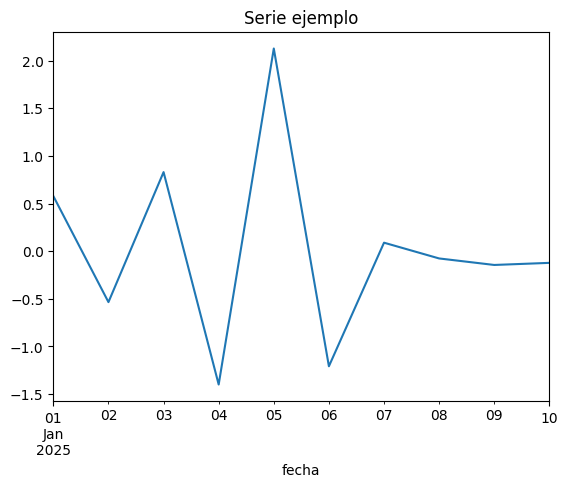

In [ ]:
import matplotlib.pyplot as plt
series = dfts['valor']
series.plot(title='Serie ejemplo')
plt.show()


# 🧪 Ejercicios prácticos (con soluciones)

Incluye ejercicios cortos y proyectos largos. Intenta resolver antes de ver la solución.


## Ejercicio 1 — Inspección y limpieza (corto)

**Descripción:** Carga el CSV `productos_ej.csv`, detecta valores faltantes, cambia el tipo de `precio` a float y crea una columna `precio_iva` con IVA 19%.

**Esqueleto:**

In [ ]:
import pandas as pd

def ejercicio1(path='productos_ej.csv'):
    # TODO: leer CSV
    # TODO: detectar NA
    # TODO: convertir precio a float
    # TODO: crear precio_iva
    pass

# print(ejercicio1())


In [ ]:
import pandas as pd

def ejercicio1(path='productos_ej.csv'):
    df = pd.read_csv(path, parse_dates=['fecha'])
    # detectar NA
    na = df.isna().sum()
    # convertir
    df['precio'] = df['precio'].astype(float)
    df['precio_iva'] = (df['precio'] * 1.19).round(2)
    return df, na

print(ejercicio1())


## Ejercicio 2 — Agrupamientos (corto)

**Descripción:** Dado un DataFrame `ventas`, calcula ventas totales por `tienda` y devuelve la tienda con mayor venta.


In [ ]:
import pandas as pd

def ejercicio2(df):
    # TODO: agrupar por tienda y sumar
    pass

# ejemplo
df_ventas = pd.DataFrame({'tienda':['A','A','B'],'venta':[10,15,20]})
# print(ejercicio2(df_ventas))


In [ ]:
import pandas as pd

def ejercicio2(df):
    grp = df.groupby('tienda').venta.sum()
    tienda_max = grp.idxmax()
    return grp, tienda_max

print(ejercicio2(df_ventas))


## Proyecto 1 — Análisis de series temporales (largo)

**Descripción:** Genera un dataset sintético de temperatura horaria durante 60 días, con ruido y una tendencia. Debes:
- Crear CSV con columnas `timestamp, temp`.
- Leerlo con pandas (parse_dates).
- Resamplear a diario y calcular media y desviación.
- Detectar días con anomalías (>3σ) y guardar `anomalies.csv`.


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

def generar_temperaturas(path='temps.csv', days=60, fs=24, seed=0):
    np.random.seed(seed)
    n = days * fs
    start = datetime(2025,1,1)
    timestamps = [start + timedelta(hours=i) for i in range(n)]
    trend = np.linspace(20,22,n)
    noise = np.random.randn(n)
    temps = trend + 2*np.sin(2*np.pi*np.arange(n)/24) + noise
    df = pd.DataFrame({'timestamp':timestamps,'temp':temps})
    df.to_csv(path,index=False)
    print('Dataset generado:', path)


def analizar_temperaturas(path='temps.csv'):
    # TODO: leer, parsear, resample diario, detectar anomalies (>3sigma)
    pass


In [ ]:
import pandas as pd
import numpy as np

def analizar_temperaturas(path='temps.csv'):
    df = pd.read_csv(path, parse_dates=['timestamp'])
    df = df.set_index('timestamp')
    daily = df.resample('D').agg({'temp':['mean','std']})
    daily.columns = ['mean','std']
    # detectar anomalies
    daily['z'] = (daily['mean'] - daily['mean'].mean()) / daily['std'].replace(0,np.nan)
    anomalies = daily[np.abs(daily['z'])>3]
    anomalies.to_csv('anomalies.csv')
    return daily, anomalies

# generar y analizar
# generar_temperaturas()
# print(analizar_temperaturas())


## Ejercicio 3 — Joins y merges (medio)

**Descripción:** Tienes dos tablas: `clientes` e `interacciones`. Junta la información para obtener `nombre, email, ultima_interaccion`.


In [ ]:
import pandas as pd

def ejercicio_joins(clientes, interacciones):
    # TODO: merge y agrupar por cliente para obtener última interacción
    pass

# Datos ejemplo
clientes = pd.DataFrame({'id':[1,2],'nombre':['Ana','Luis'],'email':['a@x.com','l@x.com']})
interacciones = pd.DataFrame({'id':[1,1,2],'ts':['2025-01-01','2025-01-05','2025-01-03']})
# print(ejercicio_joins(clientes, interacciones))


In [ ]:
import pandas as pd

def ejercicio_joins(clientes, interacciones):
    interacciones['ts'] = pd.to_datetime(interacciones['ts'])
    last = interacciones.groupby('id').ts.max().reset_index()
    res = pd.merge(clientes, last, on='id', how='left')
    res = res.rename(columns={'ts':'ultima_interaccion'})
    return res

print(ejercicio_joins(clientes, interacciones))


# ✅ Tips, recomendaciones y recursos finales

- Prefiere `dtype` en `read_csv` para controlar memoria.
- Usa `chunksize` para leer archivos muy grandes en partes.
- Para ETL profesional, considera `Dask` o `Polars` si el dataset no cabe en memoria.
- Documentación oficial: https://pandas.pydata.org/docs/
- Cursos y ejemplos: Kaggle, Real Python, DataCamp.
